# Data Exploratory Analysis

Now that the data is in a format that allows for easier and better analysis, its time to start looking at it to see if it makes sense, see how the variables behave, what kind of distributions they show, and how different subsets of the database look.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Define if IRCRA or base0
IRCRA = True

The pd.describe() function is very useful in this step of data analysis because it concisely summarizes minimum, maximum, average, deviation, quartiles, and deviation. While that information alone does not get into much detail, it is very useful to get a quick glimpse at the data.

In [2]:
if IRCRA:
    data = pd.read_csv("niceDataIRCRA.csv")
else:
    data = pd.read_csv("niceData.csv")
data.describe()

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000
mean,0.403846,27.608974,5.335256,22.273718,0.083333,171.653077,0.692308,63.581410,21.488921,0.442308,...,1.493590,1.487179,13.500000,15.891026,12.134615,14.942308,14.116987,2.448718,-0.948718,1.50000
std,0.492248,8.251353,5.479002,6.624910,0.277276,9.749309,2.965643,10.273095,2.251519,0.498260,...,1.161183,1.439028,3.764863,4.028245,3.215058,4.152326,3.608058,1.867532,2.012204,1.37019
min,0.000000,15.000000,0.500000,10.000000,0.000000,150.000000,-10.000000,40.000000,16.003658,0.000000,...,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,-5.000000,0.00000
25%,0.000000,22.000000,2.000000,19.000000,0.000000,164.000000,0.000000,56.000000,20.010952,0.000000,...,1.000000,0.000000,10.000000,14.000000,9.000000,12.000000,11.687500,1.000000,-2.000000,0.00000
50%,0.000000,25.000000,3.750000,21.000000,0.000000,170.000000,0.000000,63.000000,21.258503,0.000000,...,1.000000,1.000000,13.000000,16.000000,12.000000,15.000000,14.000000,2.000000,-1.000000,1.00000
75%,1.000000,30.250000,6.000000,24.125000,0.000000,179.000000,0.000000,70.000000,22.796824,1.000000,...,2.000000,2.000000,16.000000,18.000000,14.000000,18.000000,16.500000,3.000000,0.000000,3.00000
max,1.000000,58.000000,31.000000,53.000000,1.000000,208.000000,13.000000,108.000000,27.777778,1.000000,...,7.000000,8.000000,29.000000,29.000000,28.000000,30.000000,29.000000,8.000000,6.000000,5.00000


## Views

However, describe() by itself might end up showing too much and too varied information, and that can be overwhelming, so one way to use it better is using specific views which focuses on certain types of data. For this example lets create several views with just a few variables each:

In [3]:
#View to see a general profile of the climber
profileVars = ["AGE","YRS_CLIMBING","START_AGE","HEIGHT","WEIGHT",
               "CLIMBDAYS","TRAVEL","VACATIONS","PROJECTING","B_AVG","S_AVG"]
#View regarding their occupation
occVars = ["OCC_STUDY","OCC_PART","OCC_FULL","OCC_BOTH","OCC_NEITHER"]
#View regarding how much they train and project
trainProjVars = ["CLIMBDAYS","INDOORDAYS","TRAINDAYS","TOTALTRAIN","TRAINLENGTH",
                 "ATTEMPTS","BESTGO","PROJECTING","B_AVG","S_AVG"]
#View regarding how they train
trainHowVars = ["TRAIN_NA","TRAIN_COACH","TRAIN_BOOK","TRAIN_SELF","TRAIN_RANDOM","TRAIN_CLIMB"]
#View regarding the facilities in the gyms they use
gymVars = ["FAC_BOULDER","FAC_LEAD","FAC_TOP","FAC_AUTO",
           "FAC_BOARDS","FAC_MOON","FAC_GYM"]
#View regarding their focu during training
focusVars = ["FOCUS_FINGER","FOCUS_FOOT","FOCUS_CORE","FOCUS_END","FOCUS_POW",
             "FOCUS_SEQ","FOCUS_DIFF","FOCUS_CARDIO","FOCUS_FLEX","FOCUS_EXPLO"]
#View regarding what they do before climbing
routineVars = ["PREB_WARM","PREB_EASY","PREB_HARD",
               "PRES_WARM","PRES_EASY","PRES_HARD"]
#View on what they do on their projects
projVars = ["PROJ_ONSIGHT","PROJ_HOLDS","PROJ_REST","PROJ_TOP"]
#View regarding bouldering performance
boulderVars = ["B_INFLASH","B_INREDP","B_OUTFLASH","B_OUTREDP","B_FLASHCONF",
               "B_SENDCOF","B_AVG","B_INPOTENTIAL","B_OUTPOTENTIAL"]
#View regarding sports clibing performance
sportsVars = ["S_FLASH","S_REDP","S_FLASHCONF", "S_FINISHCONF","S_AVG",
              "S_FPOTENTIAL","S_MPOTENTIAL","S_INCONSISTENCY"]

In [4]:
data.loc[:,profileVars].describe()

,AGE,YRS_CLIMBING,START_AGE,HEIGHT,WEIGHT,CLIMBDAYS,TRAVEL,VACATIONS,PROJECTING,B_AVG,S_AVG
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,27.608974,5.335256,22.273718,171.653077,63.581410,2.75641,4.884615,1.352564,0.961538,17.467949,14.116987
std,8.251353,5.479002,6.624910,9.749309,10.273095,1.18796,6.493631,0.825438,0.769454,2.317312,3.608058
min,15.000000,0.500000,10.000000,150.000000,40.000000,0.00000,0.000000,0.000000,0.000000,12.000000,8.000000
25%,22.000000,2.000000,19.000000,164.000000,56.000000,2.00000,1.000000,1.000000,0.000000,16.000000,11.687500
50%,25.000000,3.750000,21.000000,170.000000,63.000000,3.00000,2.000000,1.000000,1.000000,17.333333,14.000000
75%,30.250000,6.000000,24.125000,179.000000,70.000000,3.00000,6.000000,2.000000,2.000000,18.708333,16.500000
max,58.000000,31.000000,53.000000,208.000000,108.000000,6.00000,20.000000,3.000000,2.000000,25.333333,29.000000


Now that we have these views we can take a quick glimpse just at the variables that we care at a given moment. From the view avobe we can start attempting to define the "average" climber. From the looks of it, the average climber...

-  is around 27-28 years old, 
-  has been climbing for around 5 years
-  is around 171 cm tall
-  weights around 64 kg
-  climbs two or three days a week
-  would climb outside of their city around 5 times a year
-  would have some climbing (but not exclusively climbing) if they went on vacations
-  mildly projects (would project if he went to the same crag by chance)
-  climbs around V4 and around 11a/6b+

Whenever you look at a database for the first time, you need to make sure it makes sense, and that the data is trustworthy. When you are not an expert in the data you are analyzing you either require to use more complex statistical measures, or consult with domain experts to verify for validity. In this case, I happen to be a rock climiber so I have knowledge about the data that I am looking at, and based on my experience this does seem to make sense and to describe an average rock climber, so I would say that the data is trustworthy and would give a green light to continue working with it.

Looking at particular information regarding extremes (min/max) we can get a better idea if there is "bad" data

-  youngest climber is 15 y/o, 
-  youngest start was at 10 years old, 
-  min height is 1.5 meters and 40 kg
-  climb V0 and 5.8 / Fr(5) or lower

All of these are quite plausible, however looking at the max there are some very slight concerns...

- oldest climber is 58 y/o
- longest climber has been climbing 31 yrs
- oldest start was at 53 y/o
- max 2.08m and 108kg
- would climb abroad over 20 times in a year
- climbs around V10 and around 14d/9a

All of theme are quite plausible as well, however, from domain knowledge I know that 9a climbers are not abundant at all in the climbing world, so while it might be true, it would pretty much have to be a professional climber, and given the scope of this survey (around 150 online volunteer random respondants, from all around the world) I don't know how likely it is that a pro-climber would answer this informal survey. The data is still possible and valid, thus i will not discard it, but it is good to have in mind its implications.

So now that we have green-lighted the data, we can start looking into more specific views...

In [5]:
data.loc[:,boulderVars].describe()

,B_INFLASH,B_INREDP,B_OUTFLASH,B_OUTREDP,B_FLASHCONF,B_SENDCOF,B_AVG,B_INPOTENTIAL,B_OUTPOTENTIAL
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,17.891026,19.301282,16.057692,17.442308,16.500000,17.615385,17.467949,1.493590,1.487179
std,2.296066,2.681886,2.743298,3.391147,2.264737,2.523340,2.317312,1.161183,1.439028
min,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.000000,0.000000
25%,17.000000,18.000000,14.000000,15.000000,15.000000,17.000000,16.000000,1.000000,0.000000
50%,18.000000,19.000000,16.000000,18.000000,17.000000,18.000000,17.333333,1.000000,1.000000
75%,19.000000,21.000000,18.000000,19.000000,18.000000,19.000000,18.708333,2.000000,2.000000
max,26.000000,27.000000,25.000000,26.000000,26.000000,26.000000,25.333333,7.000000,8.000000


In [6]:
data.loc[:,sportsVars].describe()

,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000
mean,13.500000,15.891026,12.134615,14.942308,14.116987,2.448718,-0.948718,1.50000
std,3.764863,4.028245,3.215058,4.152326,3.608058,1.867532,2.012204,1.37019
min,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,-5.000000,0.00000
25%,10.000000,14.000000,9.000000,12.000000,11.687500,1.000000,-2.000000,0.00000
50%,13.000000,16.000000,12.000000,15.000000,14.000000,2.000000,-1.000000,1.00000
75%,16.000000,18.000000,14.000000,18.000000,16.500000,3.000000,0.000000,3.00000
max,29.000000,29.000000,28.000000,30.000000,29.000000,8.000000,6.000000,5.00000


In [7]:
#Grades for reference
#base0
boulders = {"V0":0, "V1":1, "V2":2, "V3":3, "V4":4, "V5":5, "V6":6, "V7":7, "V8":8, "V9":9,
         "V10":10, "V11":11, "V12":12, "V13":13, "V14":14, "V15":15, "V16":16}
routes = {"5.8 / Fr(5) or lower":0, "5.9 / 6a":1, 
          "5.10a / 6a+":2, "5.10b / 6a+":3, "5.10c / 6b":4, "5.10d / 6b+":5,
          "5.11a / 6b+":6, "5.11b / 6c":7, "5.11c / 6c+":8, "5.11d / 7a":9,
          "5.12a / 7a+":10, "5.12b / 7b":11, "5.12c / 7b+":12, "5.12d / 7c":13,
          "5.13a / 7c+":14, "5.13b / 8a":15, "5.13c / 8a+":16, "5.13d /8b":17,
          "5.14a / 8b+":18, "5.14b / 8c":19, "5.14c / 8c+":20, "5.14d / 9a":21,
          "5.15a / 9a+":22, "5.15b / 9b":23, "5.15c / 9b+":24, "5.15d / 9c":25}

#IRCRA Grades
bouldersIRCRA = {"V0":12, "V1":14, "V2":15, "V3":17, "V4":18, "V5":19, "V6":20, "V7":21, "V8":22, "V9":24,
         "V10":25, "V11":26, "V12":27, "V13":29, "V14":30, "V15":31, "V16":32}
routesIRCRA = {"5.8 / Fr(5) or lower":8, "5.9 / 6a":9, 
          "5.10a / 6a+":10, "5.10b / 6a+":11, "5.10c / 6b":12, "5.10d / 6b+":13,
          "5.11a / 6b+":14, "5.11b / 6c":15, "5.11c / 6c+":16, "5.11d / 7a":17,
          "5.12a / 7a+":18, "5.12b / 7b":19, "5.12c / 7b+":20, "5.12d / 7c":21,
          "5.13a / 7c+":22, "5.13b / 8a":23, "5.13c / 8a+":24, "5.13d /8b":25,
          "5.14a / 8b+":26, "5.14b / 8c":27, "5.14c / 8c+":28, "5.14d / 9a":29,
          "5.15a / 9a+":30, "5.15b / 9b":31, "5.15c / 9b+":32, "5.15d / 9c":33}

## Outlier analysis

Looking at performance data, the boudler data looks very good, however, looking at the sports data we can see that the 9a climber mentioned before claims to have flashed/onsighted that 9a. There are currently only 2 climbers in the world that can onsight/flash that grade, and I am pretty confident neither of them answered this survey, so I will deem this registry faulty and proceed to delete it to remove noise.

Right now we did it manually, but another way to visualize outliers is to plot the data. As seen below, jumps between one climber group and the next is by 1 or 2 grades max, but that single climber had a 6 grade jump, which is very unlikely.

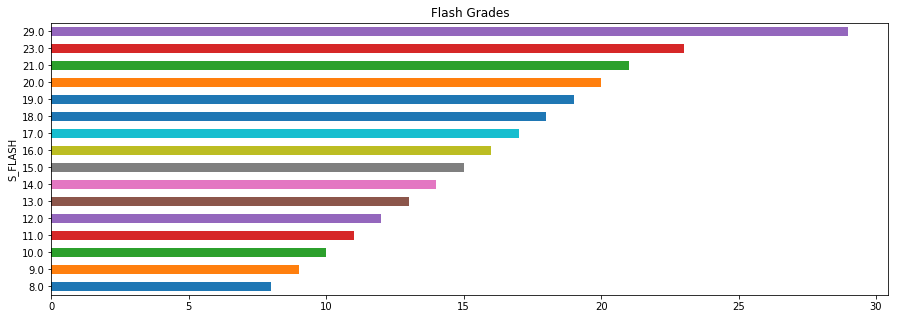

In [8]:
plot = data.groupby("S_FLASH")["S_FLASH"].mean().sort_values().plot.barh(title="Flash Grades",figsize=(15, 5))

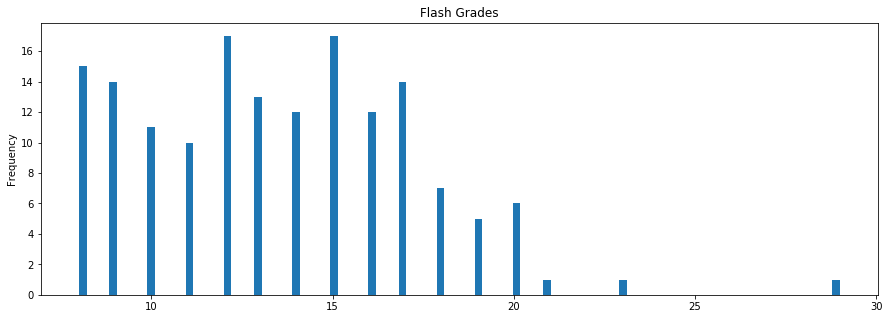

In [9]:
plot = data["S_FLASH"].plot.hist(bins = 100,title="Flash Grades",figsize=(15, 5))

In [10]:
data = data.drop(data['S_FLASH'].idxmax())
data.loc[:,sportsVars].describe()

,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.00000,155.000000
mean,13.400000,15.806452,12.032258,14.845161,14.020968,2.464516,-0.96129,1.503226
std,3.563159,3.899878,2.959509,3.983965,3.413941,1.863098,2.01257,1.374037
min,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,-5.00000,0.000000
25%,10.000000,14.000000,9.000000,12.000000,11.625000,1.000000,-2.00000,0.000000
50%,13.000000,16.000000,12.000000,15.000000,14.000000,2.000000,-1.00000,1.000000
75%,16.000000,18.000000,14.000000,18.000000,16.375000,3.000000,0.00000,3.000000
max,23.000000,26.000000,20.000000,25.000000,23.250000,8.000000,6.00000,5.000000


After removing that single registry, now the data looks much better. That climber was like 6 grades above the next climber of the list. This process to some might seem like forcing the data to look how you expect it to look, but it actually is a very common practice in Data Science.

When dealing with large datasets, there will be many times when some values of the data will be too low or too high to be real or make any sense, this specific cases are called "outliers". In this excercise the dataset is quite small and the Data Scientist happens to have domain knowledge of the data to be able to manually deal with outliers. However this usually won't be the case, datasets normally will either be too big to take a proper look at particular registries to validate them, or the scientist won't have domain knowledge in order to validate the data. 

In order to deal with outliers in bigger datasets, one would normally remove the bottom and top 1 or 2% (or everything above or below a certain number of standard deviations) of the data just to assure the removal of outliers.

## General overview

Now we can proceed to look at the rest of the views just to notice generalities in the data.

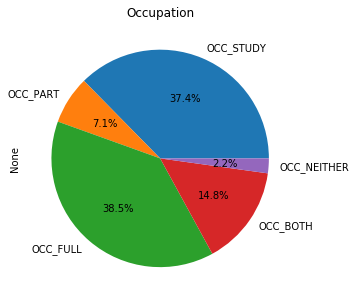

In [11]:
plot = data[occVars].mean().plot.pie(title="Occupation",autopct='%1.1f%%',figsize=(15, 5))

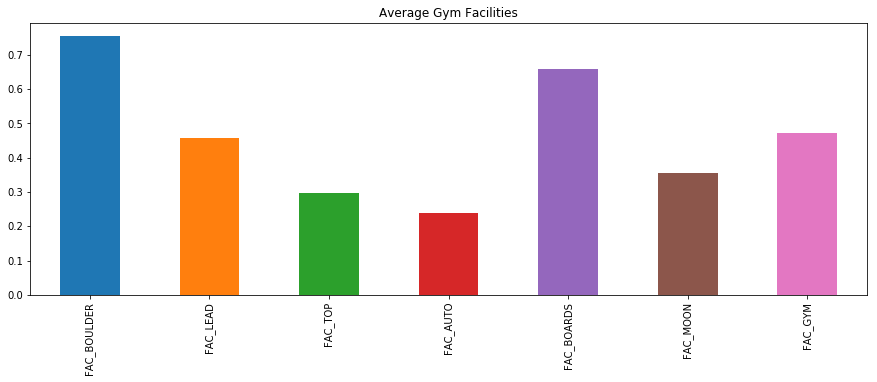

In [12]:
plot = data[gymVars].mean().plot.bar(title="Average Gym Facilities",figsize=(15, 5))

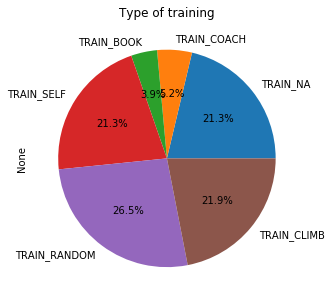

In [13]:
plot = data[trainHowVars].mean().plot.pie(title="Type of training",autopct='%1.1f%%',figsize=(15, 5))

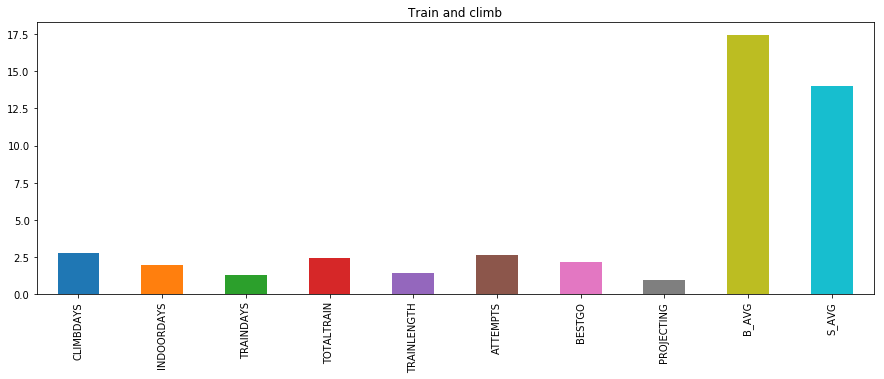

In [14]:
plot = data[trainProjVars].mean().plot.bar(title="Train and climb",figsize=(15, 5))

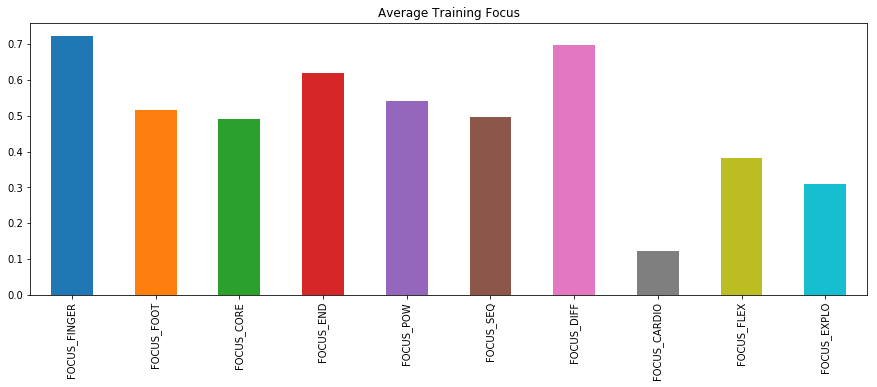

In [15]:
plot = data[focusVars].mean().plot.bar(title="Average Training Focus",figsize=(15, 5))

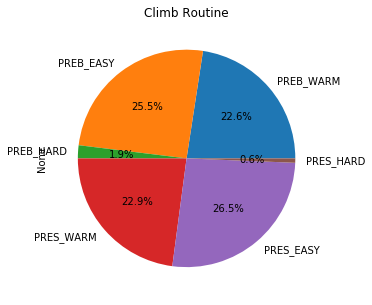

In [16]:
plot = data[routineVars].mean().plot.pie(title="Climb Routine",autopct='%1.1f%%',figsize=(15, 5))

So from these we can learn a few things that could be interesting for the people viewing the analysis...
-  most gyms have boulder, lead, gym and boards
-  most climbers focus on finger strength, climbing diversity and endurance, 
-  while most pretty much ignore cardio, and care about explosive power and flexibility to a lesser degree
-  climbers spend about half their total climbing time training
-  climbers on average give their projects 3 tries in a day and have their best performance on the second go
-  the vast majority of climbers either dont train or train by themselves / at random
-  out of those that seek for professional advice, coaches are more popular than books or online resources
-  the number of climbers that do a proper warmun and that replace warmup with easy climbing is quite even
-  and the number of climbers that dont care about waming up is minimal
-  the proportion of studying and working climbers is almost the same, and just 15% do both or neither

but... after looking at the general information we can now proceed to a usually more interesting analysis, which is the descriptive or comparative analysis of subsets of the entire data.

## Descriptive / comparative analysis of subsets of data

This is where we start comparing and noticing some potential patterns, for example women vs men, people who train vs people who dont, top 10% climbers vs bottom 10% climbers, etc.

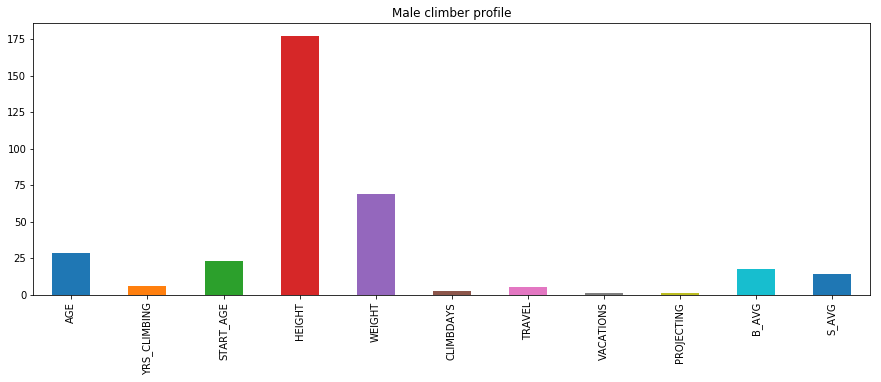

In [17]:
plot = data.loc[data.loc[:,"FEMALE"]==0,profileVars].mean().plot.bar(title="Male climber profile",figsize=(15, 5))

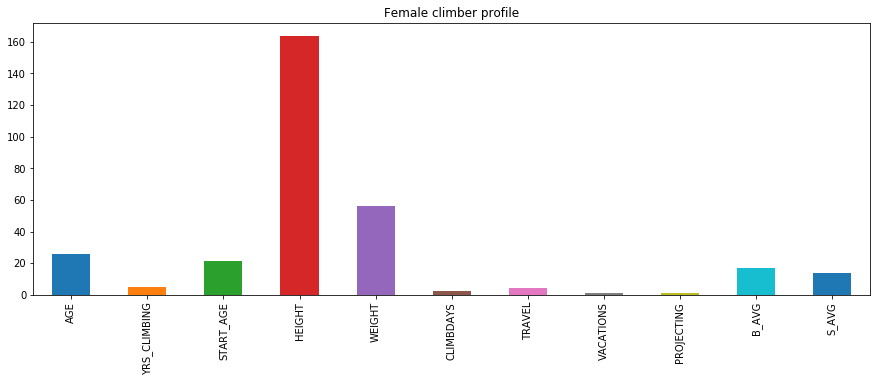

In [18]:
plot = data.loc[data.loc[:,"FEMALE"]==1,profileVars].mean().plot.bar(title="Female climber profile",figsize=(15, 5))

By looking at the data this way it is not so easy to find relations, mainly because of 2 reasons:
-  different scales
-  visualization type

The difference in scales makes it hard to compare several variables at once because height will be in the hundreths while vacations is somethin between 0 and 3. In order to make variables comparable within the same graph, one must re-scale them to a common scale. There are several strategies for that, here we will use min-max scaling so that every variable lies between 0 and 1.

Visualization type can be either the choice of graph being used, the variables being analized, or the way the variables are being compared. Instead of comparing the variables side by side, comparing the arithmetic difference could provide more insight.

In [19]:
data.describe()

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,155.000000,155.00000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.00000,155.000000
mean,0.400000,27.63871,5.356774,22.281935,0.083871,171.728258,0.696774,63.649677,21.493991,0.438710,...,1.503226,1.496774,13.400000,15.806452,12.032258,14.845161,14.020968,2.464516,-0.96129,1.503226
std,0.491486,8.26971,5.490145,6.645587,0.278093,9.735438,2.974729,10.270835,2.257924,0.497838,...,1.158673,1.438678,3.563159,3.899878,2.959509,3.983965,3.413941,1.863098,2.01257,1.374037
min,0.000000,15.00000,0.500000,10.000000,0.000000,150.000000,-10.000000,40.000000,16.003658,0.000000,...,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,-5.00000,0.000000
25%,0.000000,22.00000,2.000000,19.000000,0.000000,164.500000,0.000000,56.000000,19.993063,0.000000,...,1.000000,0.000000,10.000000,14.000000,9.000000,12.000000,11.625000,1.000000,-2.00000,0.000000
50%,0.000000,25.00000,4.000000,21.000000,0.000000,170.000000,0.000000,63.000000,21.258503,0.000000,...,1.000000,1.000000,13.000000,16.000000,12.000000,15.000000,14.000000,2.000000,-1.00000,1.000000
75%,1.000000,30.50000,6.000000,24.250000,0.000000,179.000000,0.000000,70.000000,22.810340,1.000000,...,2.000000,2.000000,16.000000,18.000000,14.000000,18.000000,16.375000,3.000000,0.00000,3.000000
max,1.000000,58.00000,31.000000,53.000000,1.000000,208.000000,13.000000,108.000000,27.777778,1.000000,...,7.000000,8.000000,23.000000,26.000000,20.000000,25.000000,23.250000,8.000000,6.00000,5.000000


In [20]:
normData = data.copy()
for c in data.columns:
    normData[c]=(data[c]-min(data[c]))/(max(data[c]-min(data[c])))
    
normData.describe()

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.400000,0.293923,0.159238,0.285626,0.083871,0.374625,0.465077,0.347789,0.466305,0.438710,...,0.214747,0.187097,0.360000,0.433692,0.336022,0.402657,0.394818,0.308065,0.367155,0.300645
std,0.491486,0.192319,0.180005,0.154549,0.278093,0.167852,0.129336,0.151042,0.191770,0.497838,...,0.165525,0.179835,0.237544,0.216660,0.246626,0.234351,0.223865,0.232887,0.182961,0.274807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.162791,0.049180,0.209302,0.000000,0.250000,0.434783,0.235294,0.338828,0.000000,...,0.142857,0.000000,0.133333,0.333333,0.083333,0.235294,0.237705,0.125000,0.272727,0.000000
50%,0.000000,0.232558,0.114754,0.255814,0.000000,0.344828,0.434783,0.338235,0.446305,0.000000,...,0.142857,0.125000,0.333333,0.444444,0.333333,0.411765,0.393443,0.250000,0.363636,0.200000
75%,1.000000,0.360465,0.180328,0.331395,0.000000,0.500000,0.434783,0.441176,0.578105,1.000000,...,0.285714,0.250000,0.533333,0.555556,0.500000,0.588235,0.549180,0.375000,0.454545,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


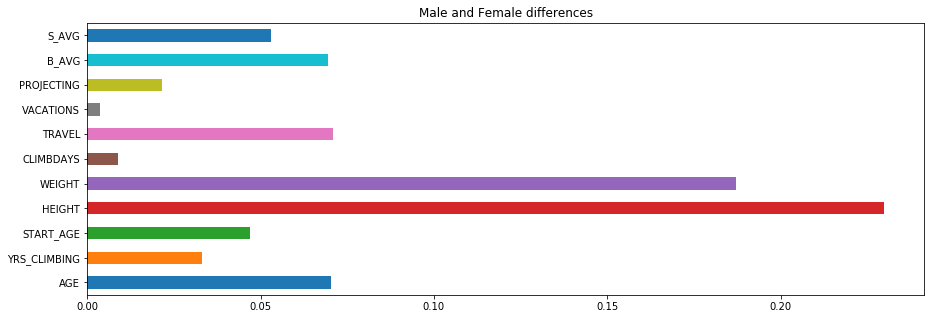

In [21]:
maleVsFemale = normData.loc[normData.loc[:,"FEMALE"]==0,profileVars].mean() - normData.loc[normData.loc[:,"FEMALE"]==1,profileVars].mean()
plot = maleVsFemale.plot.barh(title="Male and Female differences",figsize=(15, 5))

After re-scaling and changing what we compare (difference of variables instead of the variables), and how we compare it (single horizontal graph vs 2 vertical graphs) it is now very easy to describe the differences between male and female climbers. While it is of course not a rule nor a generalization, simply in general for the population that completed the survey:
-  males climb about 1% harder in sports and 7% harder in boulder
-  males like to project more
-  males make more emphasis on climbing trips
-  males area heavier, taller, older and have been climbing for longer than females

In this case it was very particular that all the differences ended up being positive, but that will not always be the case...

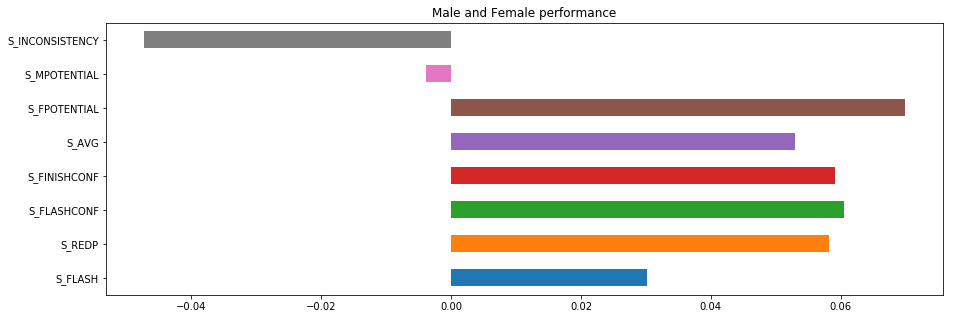

In [22]:
maleVsFemale = normData.loc[normData.loc[:,"FEMALE"]==0,sportsVars].mean() - normData.loc[normData.loc[:,"FEMALE"]==1,sportsVars].mean()
plot = maleVsFemale.plot.barh(title="Male and Female performance",figsize=(15, 5))

For example in here we can see that the difference in climbing performance between males and females is minimal (about 2% in average, less than 4% max) but females tend to be more consistent climbers, as there is a smaller difference between what their max flash and what they are confident they can flash. Now, instead of comparing by gender, we could look into more interesting subsets, maybe compare those who train versus those who dont train...

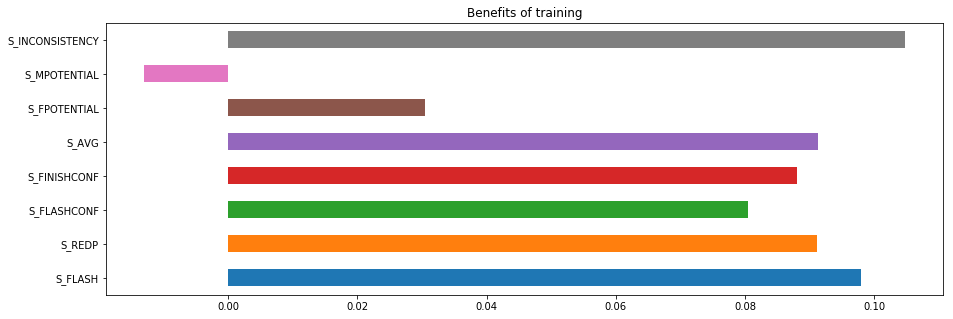

In [23]:
trainVsNot = normData.loc[normData.loc[:,"TRAIN_NA"]==0,sportsVars].mean() - normData.loc[normData.loc[:,"TRAIN_NA"]==1,sportsVars].mean()
plot = trainVsNot.plot.barh(title="Benefits of training",figsize=(15, 5))

Even though it is quite intuitive and expected, thanks to data here we can see and finally show factual evidence of the benefits of training. Climbers who train:
-  climb about 7% harder in average, 
-  are about 6% better at consistent flash/onsights 
-  are about 8% better at redpointing

And interestingly enough, data manages to show that climbers who do not train:
-  have a higher unfulfilled potential for improvement (S_MPOTENTIAL)

Lets continue exploring comparative groups... lets see the impact of projecting...

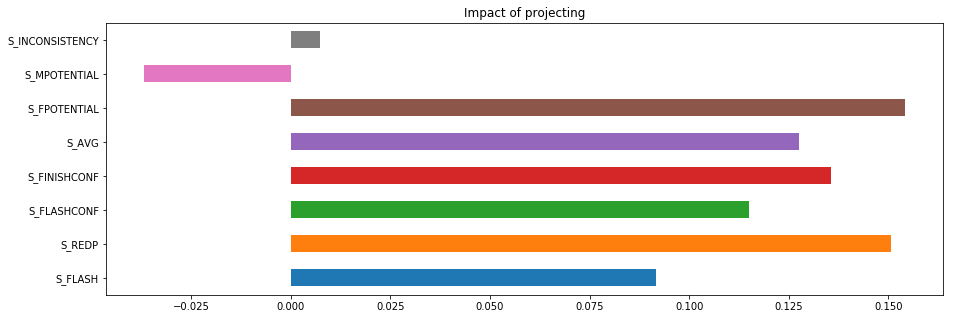

In [24]:
projVsNot = normData.loc[normData.loc[:,"PROJECTING"]==max(normData.loc[:,"PROJECTING"]),sportsVars].mean() - normData.loc[normData.loc[:,"PROJECTING"]==min(normData.loc[:,"PROJECTING"]),sportsVars].mean()
plot = projVsNot.plot.barh(title="Impact of projecting",figsize=(15, 5))

Seems like the impact of projecting is even harder than the impact of training. People who project:
-  climb about 12% harder in average, 
-  have a much higher confidence in finishing a route and in getting redpoints 
-  indirectly show improvement in flashing, so they improve as overall climbers, not just their max grade

And interestingly enough, data manages to show that climbers who do not project:
-  have a higher unfulfilled potential for improvement (S_MPOTENTIAL)
-  are more consistent climbers

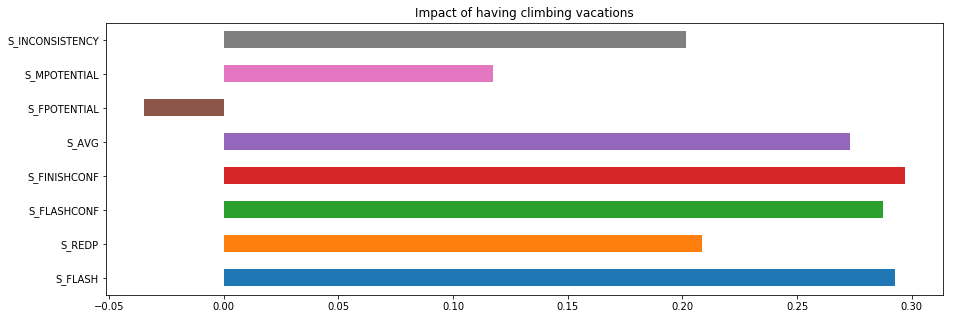

In [25]:
vacVsNot = normData.loc[normData.loc[:,"VACATIONS"]==max(normData.loc[:,"VACATIONS"]),sportsVars].mean() - normData.loc[normData.loc[:,"VACATIONS"]==min(normData.loc[:,"VACATIONS"]),sportsVars].mean()
plot = vacVsNot.plot.barh(title="Impact of having climbing vacations",figsize=(15, 5))

Here we see a very possible example of how correlation does not imply causation. This graph compares climbers who would go on vacations purely for climbing, vs climbers who wouldn't go climbing in their vacations. The difference is inmense but that does not mean that going on climbing vacations will make you 25% better. It probabl simply reflects the fact that people who go on vacations are people who really like climbing more and take it way more seriously.

So far we have been looking into random groupings and trying to see if we find an impact on performance by chance, but another strategy is to group by performane and then see the characteristics of those groups.

Lets compare the top 20% climbers vs the lower 20% climbers and see what they do...

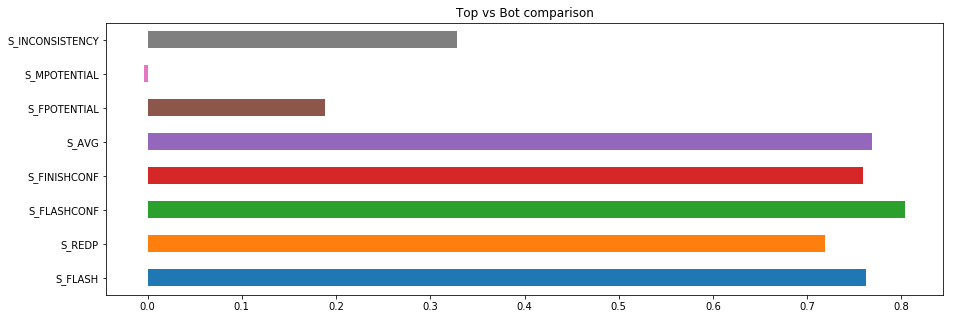

In [26]:
topVsBot = normData.loc[normData.loc[:,"S_AVG"]>.8,sportsVars].mean() - normData.loc[normData.loc[:,"S_AVG"]<.2,sportsVars].mean()
plot = topVsBot.plot.barh(title="Top vs Bot comparison",figsize=(15, 5))

Quite obviously and as expected, the strongest climbers climb way stronger, but lets see how else do they differ.

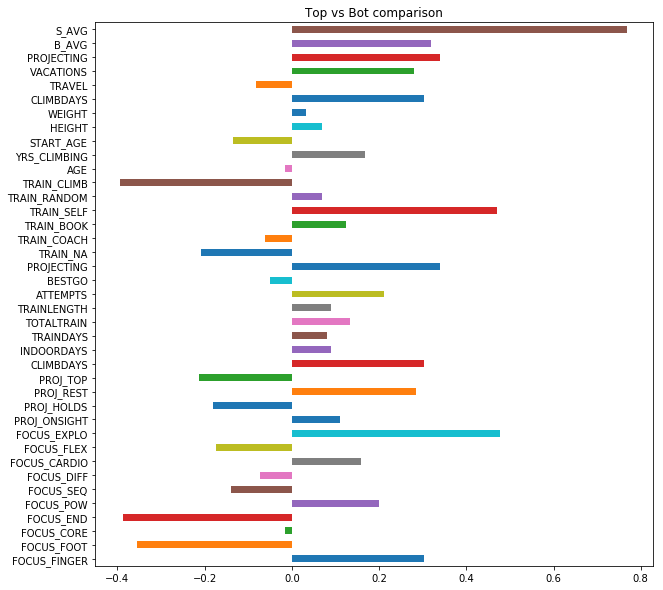

In [27]:
#Full profile to just do a single
compareProfile = focusVars + projVars + trainProjVars[:-2] + trainHowVars + profileVars 

topVsBot = normData.loc[normData.loc[:,"S_AVG"]>.8,compareProfile].mean() - normData.loc[normData.loc[:,"S_AVG"]<.2,compareProfile].mean()
plot = topVsBot.plot.barh(title="Top vs Bot comparison",figsize=(10, 10))

Now we start seeing insights that interest us. Stronger climbers...
-  Project more
-  Have vacations focused on climbing
-  Travel less (they focus on a same crag, rather than going all over the place)
-  Climb more often
-  Are taller and heavier
-  Are younger / Have been climbing for longer / started climbing earlier
-  Train by themselves or using book information (while weaker climbers either don't train or train with a coach)
-  Train more days and for longer periods
-  Try routes more times, and usually have their best go on later attempts rather than on the first ones
-  Focus their training mostly in explosive power, finger strength, power endurance and cardio
-  Will try to either onsight or climb and rest every draw

While lower performing climbers...
-  Go try many different crags
-  Either train with a coach is simply climb more in order to improve
-  Try routes less times and have their best performance in earlier climbs
-  Focus their training mostly in endurance, footwork, flexibility, specific sequences, core and different climbs
-  Will either toprope first or try every hold before trying

Some of this things were expected, but some actually came as a surprise to me, but they do make sense once you think about it. Lower-performing climbers still need to focus on their footwork and basic endurance rather than on explosive power or finger strenght since difficult and easy climbs will require very different things from the body, which are developed in different stages of the climber's life.

Finally, even though this is just exploratory analysis, there are some interesting things already, such as the different focuses on training, the way they train, mentality towards projecting and traveling, etc. It is not an explicit correlation yet, but it helps us build hypothesis in order to start testing on the next phase.

In [28]:
if IRCRA:
    data.to_csv("filteredDataIRCRA.csv",index=False)
    normData.to_csv("normDataIRCRA.csv",index=False)
else:
    data.to_csv("filteredData.csv",index=False)
    normData.to_csv("normData.csv",index=False)